In [15]:
# import time
import numpy as np
import matplotlib.pyplot as pp
# import scipy.linalg as la

%matplotlib inline

data = np.loadtxt(open("applesOranges.csv","rb"), delimiter=",", skiprows=1)
# print data

X = data[:,:2]  # data points x_1, x_2
# print X
Y = data[:,2].astype(int)  # labels for X, this is NOT the y-axis!
# print Y

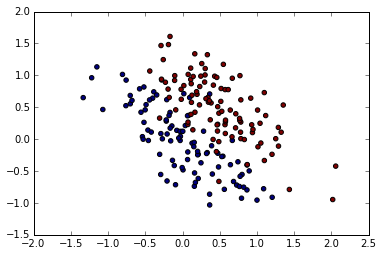

In [76]:
# 2.2 (a)
def plot_the_data(X,Y):
#     pp.figure(figsize=(9,9))
    pp.scatter(X[:,0], X[:,1], c=Y)
    
plot_the_data(X,Y)

[[  1.00000000e+00   0.00000000e+00   1.00000000e+00]
 [  9.84807753e-01   1.73648178e-01   1.00000000e+00]
 [  9.39692621e-01   3.42020143e-01   1.00000000e+00]
 [  8.66025404e-01   5.00000000e-01   1.00000000e+00]
 [  7.66044443e-01   6.42787610e-01   1.00000000e+00]
 [  6.42787610e-01   7.66044443e-01   1.00000000e+00]
 [  5.00000000e-01   8.66025404e-01   1.00000000e+00]
 [  3.42020143e-01   9.39692621e-01   1.00000000e+00]
 [  1.73648178e-01   9.84807753e-01   1.00000000e+00]
 [  6.12323400e-17   1.00000000e+00   1.00000000e+00]
 [ -1.73648178e-01   9.84807753e-01   1.00000000e+00]
 [ -3.42020143e-01   9.39692621e-01   1.00000000e+00]
 [ -5.00000000e-01   8.66025404e-01   1.00000000e+00]
 [ -6.42787610e-01   7.66044443e-01   1.00000000e+00]
 [ -7.66044443e-01   6.42787610e-01   1.00000000e+00]
 [ -8.66025404e-01   5.00000000e-01   1.00000000e+00]
 [ -9.39692621e-01   3.42020143e-01   1.00000000e+00]
 [ -9.84807753e-01   1.73648178e-01   1.00000000e+00]
 [ -1.00000000e+00   1.45473

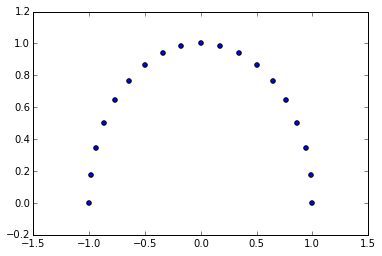

In [77]:
# 2.2 (b)
def norm(A):
    # normalize to ||w|| = 1
    return np.sqrt(np.sum(A**2,1))[:,np.newaxis]

def create_weights():
    theta = 0
    # create 19 random 2-dimensional vectors w
    # shape of W: (rows,columns) = (20,2)
    W = np.ndarray((19,2))
#     print np.hstack([W,norm(W)])
#     W = W/norm(W)
#     print np.hstack([W,norm(W)])
    degree_space = np.pi/18
    degree = 0
    for i in range(19):
        W[i,0], W[i,1] = (np.cos(degree), np.sin(degree))
        degree += degree_space

    print np.hstack([W, norm(W)])
    pp.scatter(W[:,0], W[:,1])
    
create_weights()